In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

plt.rcParams['text.usetex'] = True

# Post-Preprocessing

In [10]:
dfnum = pd.read_csv(r"D:\IMSc coursework\SystemsBiology\SysBio-course\HW-2-4\numeric_data_agri.csv")

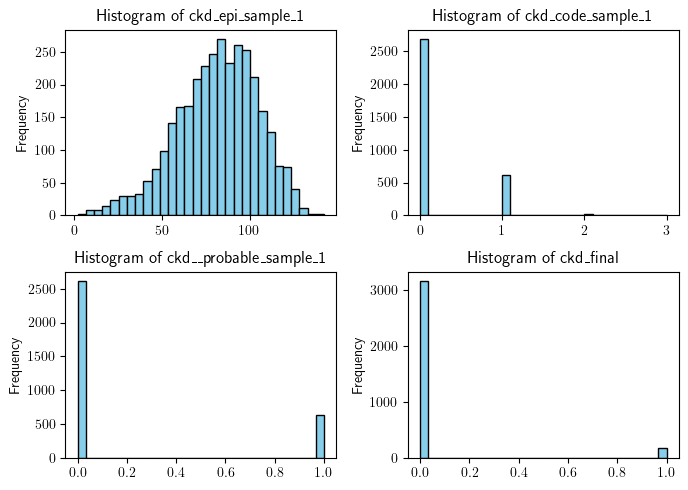

In [5]:
fig, axes = plt.subplots(2, 2, figsize=(7, 5))
axes = axes.flatten()
target_df = dfnum[['ckd_epi_sample_1', 'ckd_code_sample_1', 'ckd__probable_sample_1', 'ckd_final'] ]

for i, col in enumerate(target_df.columns):
    axes[i].hist(target_df[col].dropna(), bins=30, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_ylabel('Frequency')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig('4var_hist.pdf')
plt.show()


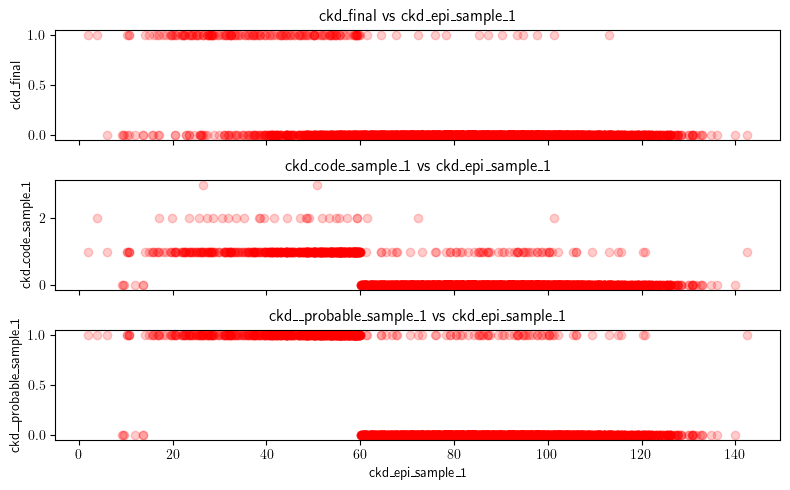

In [13]:

fig, axes = plt.subplots(3, 1, figsize=(8, 5), sharex=True)

y_vars = ['ckd_final','ckd_code_sample_1', 'ckd__probable_sample_1']
x_var = 'ckd_epi_sample_1'

for i, y in enumerate(y_vars):
    axes[i].plot(target_df[x_var], target_df[y], 'o', alpha=0.2, color='red')
    axes[i].set_ylabel(y)
    axes[i].set_title(f'{y} vs {x_var}')

axes[-1].set_xlabel(x_var)

plt.tight_layout()
# plt.savefig('targetvar_correlation.pdf')
plt.show()


# Run from here

In [3]:
dfnum = pd.read_csv(r"D:\IMSc coursework\SystemsBiology\SysBio-course\HW-2-4\numeric_data_agri.csv")

In [5]:
dfnum.columns

Index(['covid_vaccine_doses', 'gfr_cat_sample_1', 'ckd_epi_sample_1',
       'ckd__probable_sample_1', 'glucose_sample_1', 'creatinine_sample_1',
       'hb_sample_1', 'age_sample_1', 'ckd_code_sample_1',
       'working_years_current_occupation', 'no_of_family_members',
       'monthly_family_income', 'ckd_history_nocturnal_urine',
       'per_capita_income', 'outdoor_work_hours_in_day',
       'outdoor_work_days_in_week', 'sbp1', 'urine_blood', 'urine_albumin',
       'dbp2', 'sbp2', 'dbp1', 'wt', 'salt_per_month_grams',
       'waist_circumference', 'bmi', 'ht1', 'ckd_final', 'hh',
       'abroad_work_outdoor_week_hours', 'outdoor_work_year_day',
       'outdoor_work_week_hours', 'scr_dat', 'exercise_week_hours',
       'cigarettes_per_day', 'past_work_outdoor_week_hours',
       'diabetes_history_years', 'ht_history_years', 'non_veg_frequency/week',
       'somkeless_tobacco_years', 'alcohol_years', 'smoking_years', 'sbp_avg',
       'dbp_avg', 'ht3', 'missing_frac_row'],
      dty

In [5]:
df_clean = dfnum.dropna(subset=['ckd_code_sample_1'])
X = df_clean.drop(columns=['ckd_code_sample_1', 'ckd__probable_sample_1', 'ckd_final', 'ckd_epi_sample_1'])
y = df_clean['ckd_code_sample_1']

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:


df_clean = dfnum.dropna(subset=['ckd_code_sample_1'])
X = df_clean.drop(columns=['ckd_code_sample_1', 'ckd__probable_sample_1', 'ckd_final', 'ckd_epi_sample_1'])
y = df_clean['ckd_code_sample_1']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

CDK_DT_model = DecisionTreeClassifier(
    criterion='entropy',
    random_state=421,
    class_weight='balanced'  
)
CDK_DT_model.fit(X_train, y_train)

y_pred = CDK_DT_model.predict(X_test)

print(classification_report(y_test, y_pred, zero_division=0))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.98      0.97      0.97       539
         1.0       0.83      0.85      0.84       122
         2.0       0.00      0.00      0.00         6

    accuracy                           0.94       667
   macro avg       0.60      0.61      0.60       667
weighted avg       0.94      0.94      0.94       667

[[523  16   0]
 [ 12 104   6]
 [  0   6   0]]


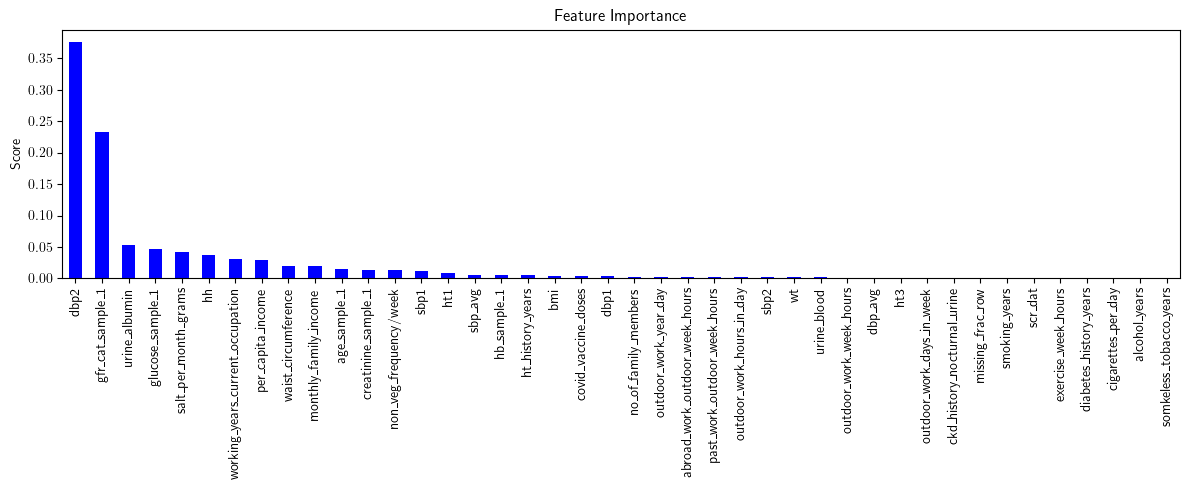

In [37]:

importances = pd.Series(CDK_DT_model.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).plot(kind='bar',color='blue', figsize=(12, 5))
plt.title("Feature Importance")
plt.ylabel("Score")
plt.savefig('DT_feature_imp.pdf')
plt.tight_layout()

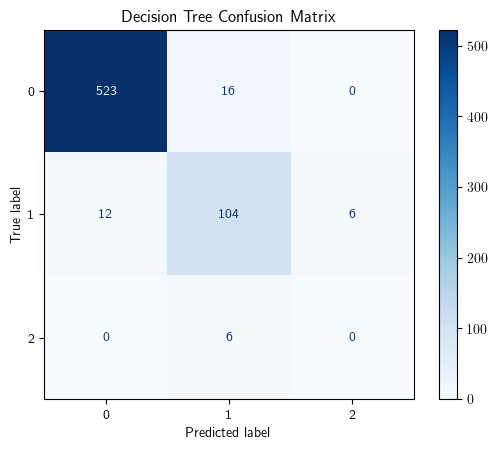

In [ ]:

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', values_format='d')

plt.title("Decision Tree Confusion Matrix")
plt.savefig('DT_conf_matrix.pdf')
plt.show()


# def ConfusionMatrix(y_test, y_pred, cmap, method)
#     cm = confusion_matrix(y_test, y_pred)

#     disp = ConfusionMatrixDisplay(confusion_matrix=cm)
#     disp.plot(cmap=cmap, values_format='d')

#     plt.title(f"{mathod} Confusion Matrix")
#     plt.savefig(f'{method}_conf_matrix.pdf')
#     plt.show()


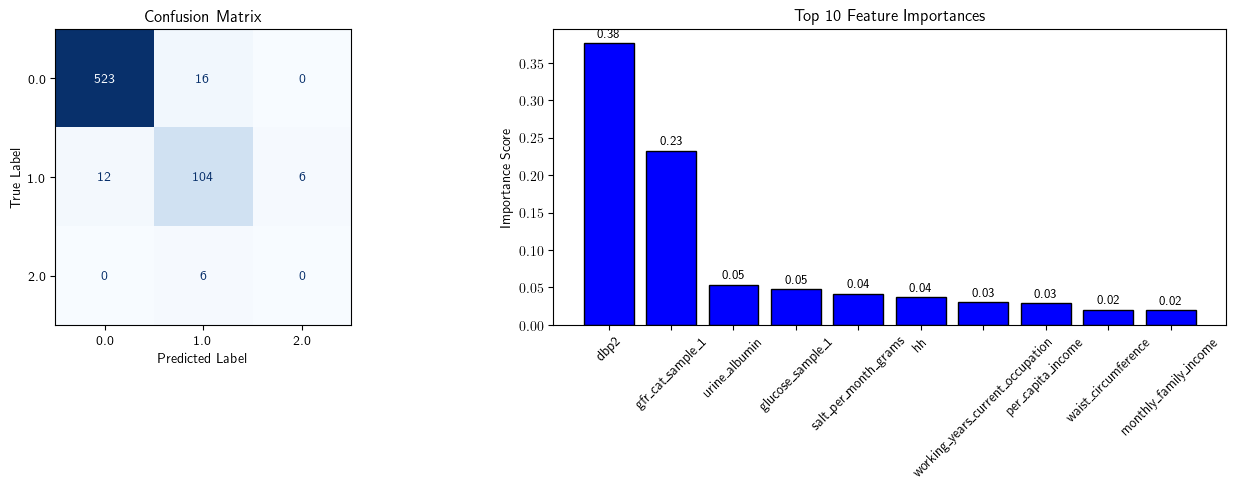

In [ ]:

cm = confusion_matrix(y_test, y_pred)
labels = sorted(np.unique(np.concatenate([y_test, y_pred])))

importances = pd.Series(CDK_DT_model.feature_importances_, index=X.columns)
top10 = importances.sort_values(ascending=False).head(10)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(ax=axes[0], cmap='Blues', values_format='d', colorbar=False)
axes[0].set_title("Confusion Matrix")
axes[0].set_xlabel("Predicted Label")
axes[0].set_ylabel("True Label")

bars = axes[1].bar(top10.index, top10.values, color='blue', edgecolor='black')
axes[1].set_title("Top 10 Feature Importances")
axes[1].set_ylabel("Importance Score")
axes[1].tick_params(axis='x', rotation=45)

for bar in bars:
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2, height + 0.005, f'{height:.2f}',
                 ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.savefig('DT_summary.pdf', bbox_inches='tight', dpi=300)
plt.show()

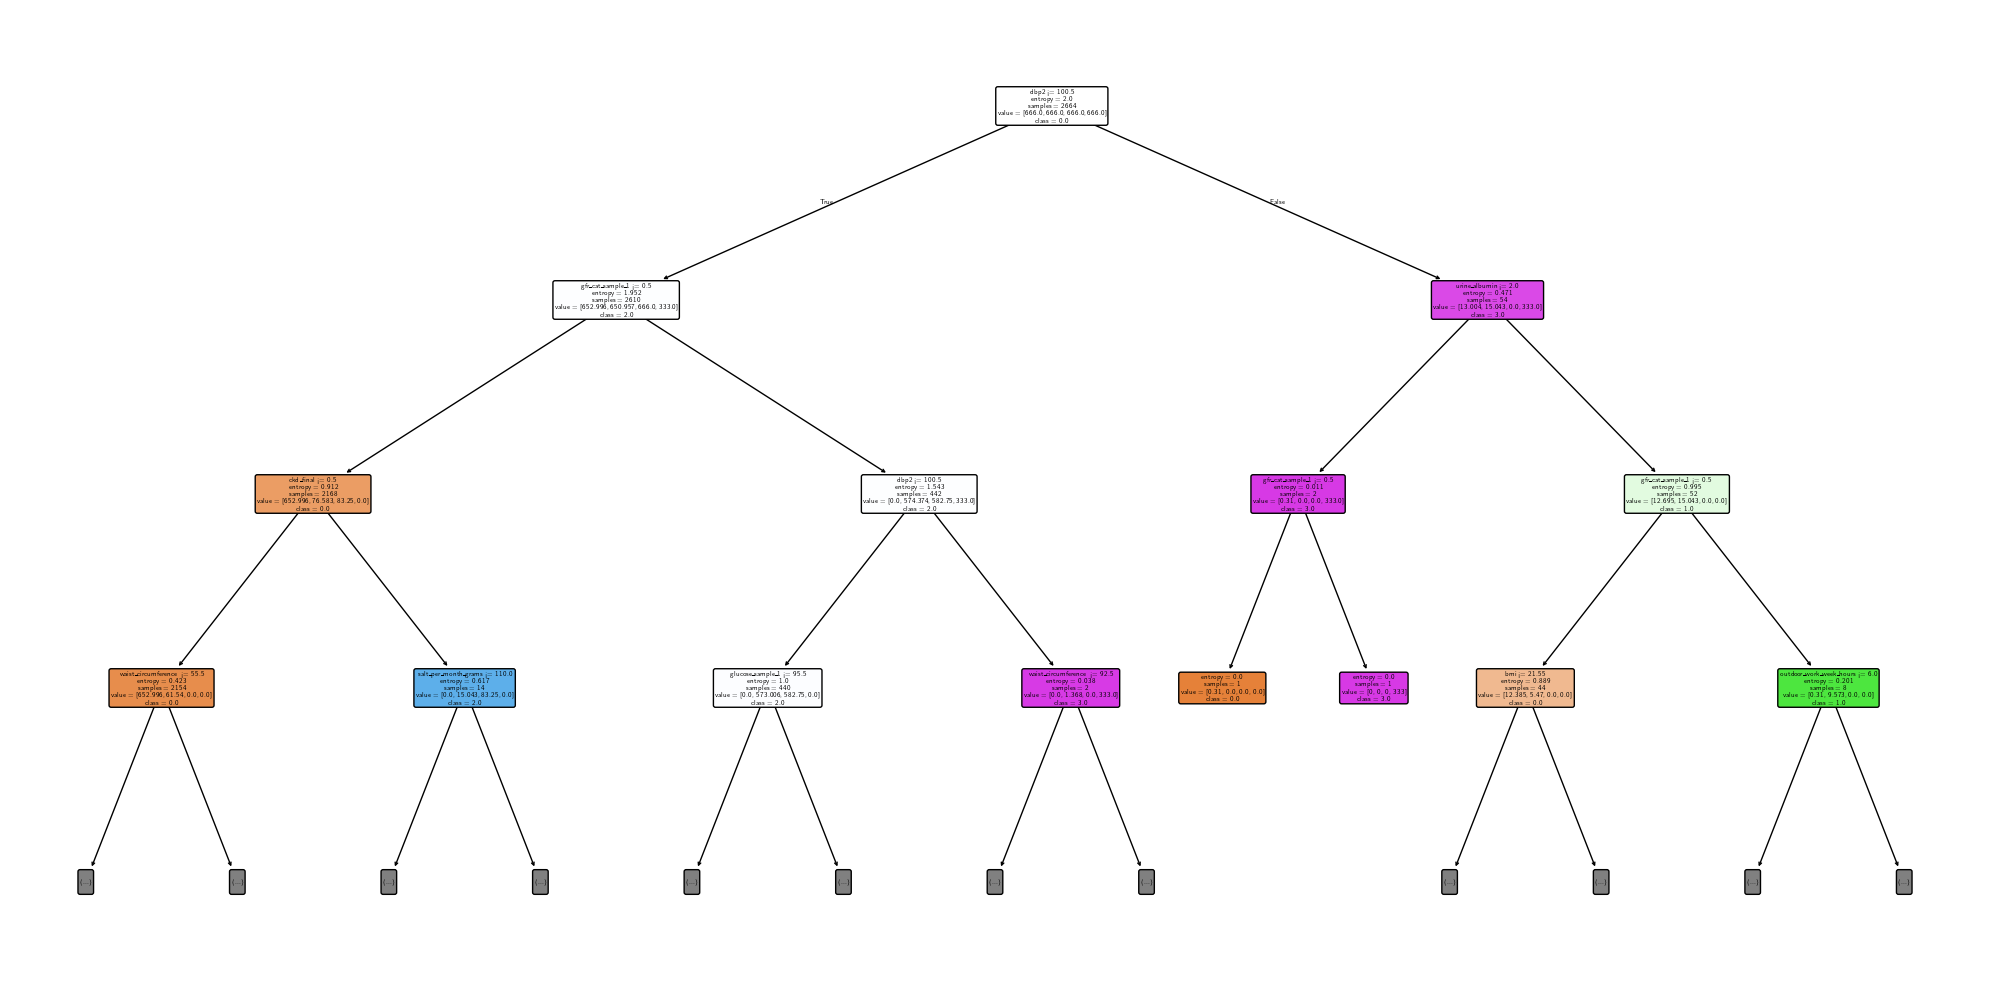

In [18]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))
plot_tree(CDK_DT_model, feature_names=X.columns, class_names=[str(c) for c in sorted(y.unique())],
          filled=True, rounded=True, max_depth=3)
plt.tight_layout()
plt.savefig("decision_tree_structure.pdf")
plt.show()


# Random Forest. 

In [ ]:

from sklearn.ensemble import RandomForestClassifier
from joblib import delayed, Parallel
from tqdm import tqdm

## Optimum number of trees

In [6]:
def RFClassifier(X, y, trees):
    X_temp, X_test, y_temp, y_test = train_test_split(
        X, y, test_size=0.2, stratify=y, random_state=42
)
    X_train, X_val, y_train, y_val = train_test_split(
        X_temp, y_temp, test_size=0.25, stratify=y_temp, random_state=42
)
    clf = RandomForestClassifier(
        n_estimators=trees, 
        random_state=42, 
        class_weight='balanced'  
    )
    clf.fit(X_train, y_train)
    
    y_train_pred = clf.predict(X_train)
    y_val_pred = clf.predict(X_val)
    y_test_pred = clf.predict(X_test)

    report_train = classification_report(y_train, y_train_pred, output_dict=True, zero_division=0)#.get('accuracy')
    report_val = classification_report(y_val, y_val_pred, output_dict=True, zero_division=0)#.get('accuracy')
    report_test = classification_report(y_test, y_test_pred, output_dict=True, zero_division=0)#.get('accuracy')

    train_acc = report_train.get('accuracy')
    val_acc = report_val.get('accuracy')
    test_acc = report_test.get('accuracy')

    return [train_acc, val_acc, test_acc]

In [7]:
def RF_wrapper(tree):
    return RFClassifier(
        X, y,
        trees=tree
    )

# dfnum = pd.read_csv('numeric_data_agri.csv')
n_tree = np.linspace(1, 600, 59, dtype=int)
accs = np.zeros_like(n_tree)

accuracies = Parallel(n_jobs=-1)(
    delayed(RF_wrapper)(tree) for tree in tqdm(n_tree)
)



100%|██████████| 59/59 [00:04<00:00, 12.66it/s]


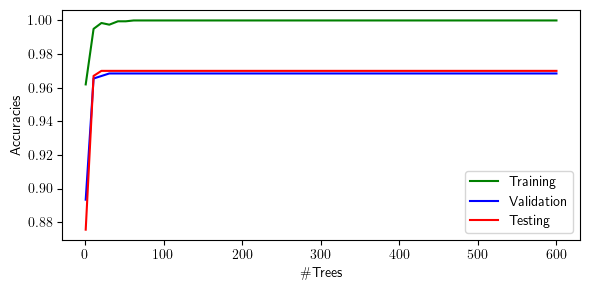

In [8]:

accuracies = np.array(accuracies)
plt.figure(figsize=(6, 3))
plt.plot(n_tree, accuracies[:,0], '-', color='green', label='Training')
plt.plot(n_tree, accuracies[:,1], '-', color='blue', label='Validation')
plt.plot(n_tree, accuracies[:,2], '-', color='red', label='Testing')
# plt.plot(n_tree, accuracies, 'o', markersize=4, alpha=.6, c='red')
plt.xlabel('\#Trees')
plt.ylabel('Accuracies')
plt.legend()
plt.tight_layout()
plt.savefig(f'RF_acc_tree.png', dpi=450)



## Classification

In [9]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y
)

CDK_RF_model = RandomForestClassifier(
    n_estimators=100, 
    random_state=42, 
    class_weight='balanced'  
)
CDK_RF_model.fit(X_train, y_train)
y_pred = CDK_RF_model.predict(X_test)

print(classification_report(y_test, y_pred,zero_division=0)) 
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       539
         1.0       0.95      0.90      0.92       122
         2.0       0.00      0.00      0.00         6

    accuracy                           0.97       667
   macro avg       0.64      0.63      0.64       667
weighted avg       0.96      0.97      0.97       667

[[539   0   0]
 [ 12 110   0]
 [  0   6   0]]


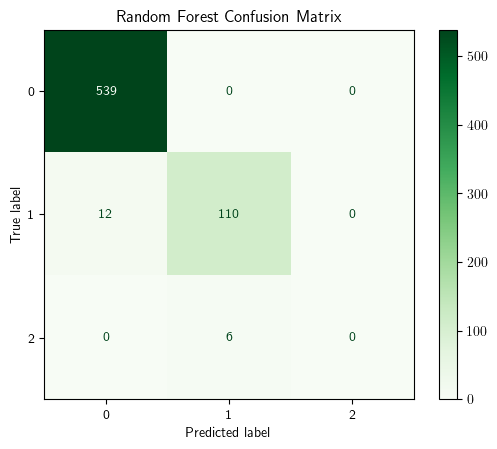

In [10]:

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Greens', values_format='d')

plt.title("Random Forest Confusion Matrix")
plt.savefig('RF_conf_matrix.pdf')
plt.show()

c:\Users\aksha\.conda\envs\py311\Lib\site-packages\sklearn\metrics\_ranking.py:1201: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


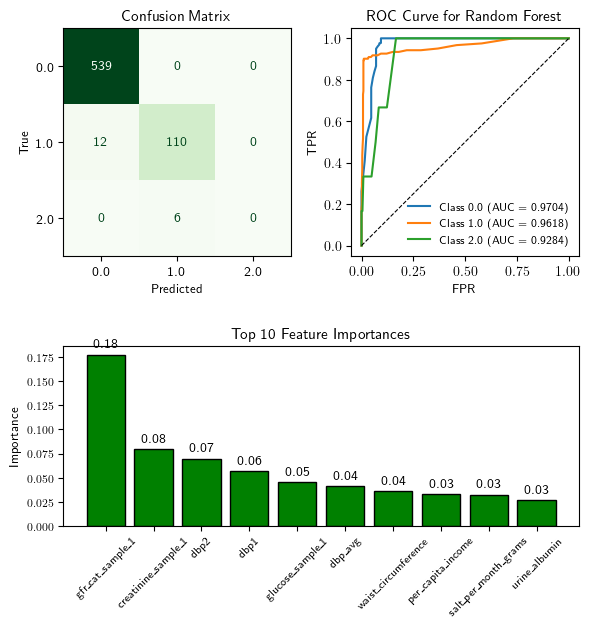

In [39]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

cm = confusion_matrix(y_test, y_pred)
labels = sorted(np.unique(np.concatenate([y_test, y_pred])))
importances = pd.Series(CDK_RF_model.feature_importances_, index=X.columns)
top10 = importances.sort_values(ascending=False).head(10)
y_proba = CDK_RF_model.predict_proba(X_test)
classes = CDK_RF_model.classes_

fig = plt.figure(figsize=(6, 6))  
ax0 = fig.add_axes([0.07, 0.55, 0.38, 0.38])  # [left, bottom, width, height]
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(ax=ax0, cmap='Greens', values_format='d', colorbar=False)
ax0.set_title("Confusion Matrix", fontsize=11)
ax0.set_xlabel("Predicted", fontsize=9)
ax0.set_ylabel("True", fontsize=9)
for artist in ax0.artists + ax0.lines:
    artist.set_clip_on(False)

ax1 = fig.add_axes([0.55, 0.55, 0.38, 0.38])
for i, cls in enumerate(classes):
    fpr, tpr, _ = roc_curve(y_test == cls, y_proba[:, i])
    roc_auc = auc(fpr, tpr)
    if not np.isnan(roc_auc):
        ax1.plot(fpr, tpr, label=f'Class {cls} (AUC = {roc_auc:.4f})')
ax1.plot([0, 1], [0, 1], 'k--', lw=0.8)
ax1.set_xlabel('FPR', fontsize=9)
ax1.set_ylabel('TPR', fontsize=9)
ax1.set_title('ROC Curve for Random Forest', fontsize=11)
ax1.legend(fontsize=8, loc='lower right', frameon=False)

ax2 = fig.add_axes([0.07, 0.1, 0.86, 0.30])
bars = ax2.bar(top10.index, top10.values, color='green', edgecolor='black')
ax2.set_title("Top 10 Feature Importances", fontsize=11)
ax2.set_ylabel("Importance", fontsize=9)
ax2.tick_params(axis='x', rotation=45, labelsize=8)
ax2.tick_params(axis='y', labelsize=8)
for bar in bars:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2, height + 0.005, f'{height:.2f}',
             ha='center', va='bottom', fontsize=10)

plt.savefig('RF_summary.pdf', bbox_inches='tight', dpi=300)
plt.show()


# FFNL

In [4]:

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [35]:
num_class= len(y.unique())
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y
)

CKD_FFNN_model = Sequential([
    Dense(len(df_clean.columns), activation='sigmoid', input_shape=(X_train.shape[1],)), Dropout(0.01),
    Dense(128, activation='sigmoid'), Dropout(0.01),
    Dense(64, activation='sigmoid'), Dropout(0.01),
    Dense(32, activation='sigmoid'), Dropout(0.01),
    Dense(num_class, activation='relu')  
    ])
epsilon = 1e-1; epochs = 50

CKD_FFNN_model.compile(optimizer=Adam(learning_rate=epsilon),
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

history = CKD_FFNN_model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test))    


Epoch 1/50


c:\Users\aksha\.conda\envs\py311\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8060 - loss: 1.3863 - val_accuracy: 0.8081 - val_loss: 1.3863
Epoch 2/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8030 - loss: 1.3863 - val_accuracy: 0.8081 - val_loss: 1.3863
Epoch 3/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8126 - loss: 1.3863 - val_accuracy: 0.8081 - val_loss: 1.3863
Epoch 4/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8157 - loss: 1.3863 - val_accuracy: 0.8081 - val_loss: 1.3863
Epoch 5/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7975 - loss: 1.3863 - val_accuracy: 0.8081 - val_loss: 1.3863
Epoch 6/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8107 - loss: 1.3863 - val_accuracy: 0.8081 - val_loss: 1.3863
Epoch 7/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8005 - loss: 1.3863 - val_accuracy: 0.8081 - val_loss: 1.3863
Epoch 8/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8237 - loss: 1.3863 - val_accuracy: 0.8081 - val_loss: 1.3863
Epo

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
              precision    recall  f1-score   support

         0.0       0.81      1.00      0.89       539
         1.0       0.00      0.00      0.00       122
         2.0       0.00      0.00      0.00         6

    accuracy                           0.81       667
   macro avg       0.27      0.33      0.30       667
weighted avg       0.65      0.81      0.72       667



c:\Users\aksha\.conda\envs\py311\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\aksha\.conda\envs\py311\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\aksha\.conda\envs\py311\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


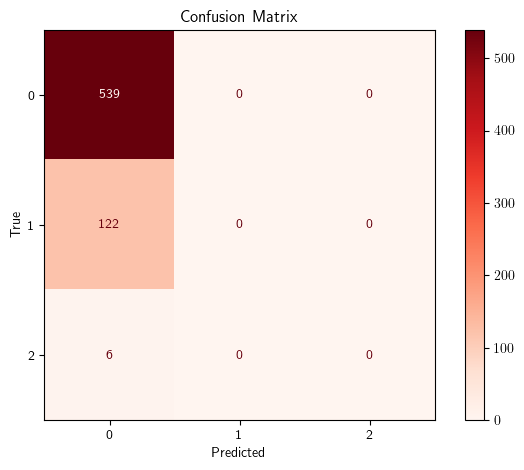

In [36]:
y_pred_probs = CKD_FFNN_model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Reds')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.savefig('FFNL_summary.pdf')
plt.tight_layout()
plt.show()

# Alternate Questions